### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors._classification import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

### Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Dataset Kanker

In [ ]:
data = pd.read_csv('drive/MyDrive/datasetkanker/dataset_kanker_60 - Copy.csv')
data.sample(10)
data.shape

(172, 11)

### **Scaling**

In [ ]:
data.describe()

,PERUT TERASA MEMBESAR,PERUT KEMBUNG,NYERI PERUT,MUAL/MUNTAH,NAFSU MAKAN MENURUN,CEPAT KENYANG,GANGGUAN BAK,GANGGUAN BAB,GANGGUAN MENSTRUASI,PENURUNAN BB,BENIGN/MALIGNANCY
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.843023,0.476744,0.424419,0.465116,0.593023,0.511628,0.098837,0.133721,0.401163,0.616279,2.534884
std,0.364841,0.500917,0.495698,0.500238,0.492705,0.501324,0.299315,0.341346,0.491565,0.487711,0.500238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
scaling = StandardScaler()

for col in ["PERUT TERASA MEMBESAR", "PERUT KEMBUNG", "NYERI PERUT", "MUAL/MUNTAH", "NAFSU MAKAN MENURUN", "CEPAT KENYANG", "GANGGUAN BAK", "GANGGUAN BAB", "GANGGUAN MENSTRUASI", "PENURUNAN BB"]:
  data[col] = scaling.fit_transform(data[col].values.reshape(-1,1))
data.head()
data.sample(10)

,PERUT TERASA MEMBESAR,PERUT KEMBUNG,NYERI PERUT,MUAL/MUNTAH,NAFSU MAKAN MENURUN,CEPAT KENYANG,GANGGUAN BAK,GANGGUAN BAB,GANGGUAN MENSTRUASI,PENURUNAN BB,BENIGN/MALIGNANCY
50,-2.317406,-0.954521,-0.858705,1.072381,-1.207122,-1.023533,-0.331176,-0.392890,-0.818476,-1.267304,2
26,0.431517,1.047645,-0.858705,-0.932505,0.828417,0.977008,-0.331176,-0.392890,-0.818476,0.789076,2
17,-2.317406,-0.954521,-0.858705,1.072381,0.828417,-1.023533,-0.331176,-0.392890,-0.818476,0.789076,2
158,0.431517,1.047645,1.164545,1.072381,-1.207122,-1.023533,-0.331176,2.545243,1.221783,-1.267304,3
81,0.431517,-0.954521,-0.858705,-0.932505,-1.207122,-1.023533,-0.331176,-0.392890,-0.818476,-1.267304,2
130,0.431517,-0.954521,1.164545,1.072381,0.828417,0.977008,-0.331176,-0.392890,1.221783,0.789076,3
74,-2.317406,1.047645,-0.858705,-0.932505,-1.207122,-1.023533,-0.331176,-0.392890,-0.818476,-1.267304,2
38,0.431517,-0.954521,-0.858705,1.072381,0.828417,0.977008,3.019544,-0.392890,-0.818476,0.789076,2
36,0.431517,-0.954521,-0.858705,-0.932505,0.828417,-1.023533,-0.331176,-0.392890,-0.818476,0.789076,2
153,0.431517,-0.954521,-0.858705,-0.932505,0.828417,-1.023533,-0.331176,-0.392890,-0.818476,0.789076,3


### **Split Data**

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
X_test.shape

(52, 10)

### KNN

Looping untuk mendapatkan K dengan akurasi tertinggi

In [ ]:
k_range = range(1,len(X_test)+1)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_test, y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'testing accuracy')

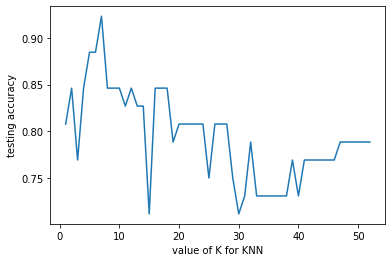

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('testing accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_prediksi=knn.predict(X_test)

print("Y asli      = ",y_test.values)
print("Y_prediksi  = ",y_prediksi)

Y asli      =  [2 2 2 3 2 2 3 3 3 2 2 3 3 2 3 2 3 2 3 3 3 2 3 3 2 3 2 3 3 3 2 2 2 2 2 2 2
 3 2 3 2 3 3 3 3 3 3 2 2 2 2 3]
Y_prediksi  =  [2 2 2 3 2 2 3 3 3 2 2 3 3 2 3 3 3 2 3 3 3 2 3 3 2 3 2 3 3 2 2 2 2 2 3 2 2
 2 2 3 2 3 3 3 3 3 3 2 2 2 2 3]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediksi).ravel()
tn, fp, fn, tp

(24, 2, 2, 24)

In [ ]:
akurasi = (tp + tn) / (tp + fp + tn + fn)
er = (fp + fn) / (tp + fp + tn + fn)
recall = tp / (tp + fn)
specificity = tn / (fp + tn)
precision = tp / (tp + fp)
fscore = (2 * precision * recall) / (precision + recall)
print("Akurasi = ", round(akurasi,3))
print("Error Rate = ", round(er,3))
print("Recall = ", round(recall,3))
print("Specificity = ", round(specificity,3))
print("Precision = ", round(precision,3))
print("F-Score = ", round(fscore,3))


Akurasi =  0.923
Error Rate =  0.077
Recall =  0.923
Specificity =  0.923
Precision =  0.923
F-Score =  0.923
